# **INFORMACIÓN GENERAL**

## Integrantes:
+ Karen Tatiana Pimiento Martinez- 2204129
+ Anderson Yesth Acuña Vargas - 2191965
+ Miguel Angel Plata Rodriguez- 2190050

## Características del trabajo
### Descripción
Utilizando un conjunto de datos sobre viruela símica, publicado por el Instituto Nacional de Salud, aplicamos diferentes herramientas estadísticas para analizar la diferentes relaciones entre las variables suministradas. 
### Selección de variables
Las variables seleccionadas son:
* Semana epidemiológica
* Año epidemiológica
* Departamento
* Municipio
* Sexo
* Edad
* Fecha de inicio de síntomas
* Fecha de exantema
* Hospitalización
* Fuente de infección
* Tipo de seguridad social

## Fuentes
Esta base de datos se encontro en Casos positivos de Viruela símica en Colombia en:

*El Instituto Nacional de Salud Publicó el Conjunto de Datos de Viruela Símica en Colombia | Datos Abiertos. (s. f.). https://herramientas.datos.gov.co/noticias/el-instituto-nacional-de-salud-publico-el-conjunto-de-datos-de-viruela-simica-en-colombia*

# **CONTENIDO**

## 1. Importación y filtrado del conjunto de datos

In [115]:
import pandas as pd
import statistics as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Casos_positivos_de_Viruela_s_mica_en_Colombia.csv')
df.head()

,Semana epidemiológica,Año epidemiológico,Código DIVIPOLA departamento,Código DIVIPOLA municipio,Departamento,Municipio,Fecha notificación,Fecha diagnóstico,Sexo,Edad,...,Condición final,Vínculo epidemiológico,¿Viajó?,País de viaje,Fuente de infección,Fecha de terminación del seguimiento,Pertenencia étnica,Nombre grupo étnico,Tipo de seguridad social,Estrato
0,37,2022,5,5088,ANTIOQUIA,BELLO,2022-09-19T00:00:00.000,2022-09-20T00:00:00.000,M,18,...,1,2,2.0,NaN,FUENTE DESCONOCIDA,2022-10-06T00:00:00.000,6,NaN,C,999
1,37,2022,11,11001,BOGOTA,BOGOTA,2022-09-21T00:00:00.000,2022-09-21T00:00:00.000,M,30,...,1,2,2.0,NaN,FUENTE DESCONOCIDA,2022-10-04T00:00:00.000,6,NaN,C,999
2,37,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-19T00:00:00.000,2022-09-21T00:00:00.000,M,37,...,1,2,2.0,NaN,RELACIONADO CON FUENTE DESCONOCIDA,2022-10-08T00:00:00.000,6,NaN,S,999
3,33,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-02T00:00:00.000,2022-09-05T00:00:00.000,M,26,...,1,2,2.0,NaN,FUENTE DESCONOCIDA,2022-09-10T00:00:00.000,6,NaN,S,999
4,37,2022,5,5001,ANTIOQUIA,MEDELLIN,2022-09-20T00:00:00.000,2022-09-23T00:00:00.000,M,37,...,1,2,2.0,NaN,FUENTE DESCONOCIDA,2022-10-08T00:00:00.000,6,NaN,C,999


Descartamos las columnas que no vamos a utilizar y limpiamos de nulos nuestra tabla de datos.

In [104]:
df = df.drop(columns=[
    'Código DIVIPOLA departamento',
    'Código DIVIPOLA municipio',
    'Fecha notificación',
    'Fecha diagnóstico',
    'Unidad de medida',
    'Condición final',
    '¿Viajó?',
    'País de viaje',
    'Fecha de terminación del seguimiento',
    'Pertenencia étnica',
    'Nombre grupo étnico',
    'Estrato'
])

filas_totales = len(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Semana epidemiológica        4089 non-null   int64 
 1   Año epidemiológico           4089 non-null   int64 
 2   Departamento                 4089 non-null   object
 3   Municipio                    4089 non-null   object
 4   Sexo                         4089 non-null   object
 5   Edad                         4089 non-null   int64 
 6   Fecha de inicio de síntomas  4089 non-null   object
 7   Fecha de exantema            4089 non-null   object
 8   Hospitalización              4089 non-null   int64 
 9   Vínculo epidemiológico       4089 non-null   int64 
 10  Fuente de infección          4089 non-null   object
 11  Tipo de seguridad social     4089 non-null   object
dtypes: int64(5), object(7)
memory usage: 383.5+ KB


Como vemos no tenemos filas con valores nulos en las columnas que vamos a utilizar para nuestro análisis, por lo tanto, el conjunto de datos está listo para ser tratado.

## 2. Análisis

### 2.1. Medidas de tendencia central

#### 2.1.1. Media

In [105]:
media_edad = df['Edad'].mean()
media_edad = int(media_edad)
print('La media de la edad de las personas que tiene la viruela de este conjunto de datos es: ' + str( media_edad))

media_semanaepidemio = df['Semana epidemiológica'].mean()
media_semanaepidemio = int(media_semanaepidemio)
print('\nLa media de la Semana epidemiologica de las personas que tiene la viruela de este conjunto de datos es: ' + str(media_semanaepidemio))

media_anoepidemiologico = df['Año epidemiológico'].mean()
media_anoepidemiologico = int(media_anoepidemiologico)
print('\nLa media del año epidemiologica de las personas que tiene la viruela de este conjunto de datos es: ' + str(media_anoepidemiologico))

media_hospitalizacion = df['Hospitalización'].mean()
media_hospitalizacion = int(media_hospitalizacion)
print('\nLa media de Hospitalizacion de las personas que tiene la viruela de este conjunto de datos es: ' + str(media_hospitalizacion))

df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas'])
media_fechasintomas = df['Fecha de inicio de síntomas'].mean()
print('\nLa media de la fecha de inicio de síntomas es:', media_fechasintomas)

df['Fecha de exantema'] = pd.to_datetime(df['Fecha de exantema'])
media_Fechadeexantema = df['Fecha de exantema'].mean()
print('\nLa media de la fecha de exantema es:', media_Fechadeexantema)

La media de la edad de las personas que tiene la viruela de este conjunto de datos es: 32

La media de la Semana epidemiologica de las personas que tiene la viruela de este conjunto de datos es: 36

La media del año epidemiologica de las personas que tiene la viruela de este conjunto de datos es: 2022

La media de Hospitalizacion de las personas que tiene la viruela de este conjunto de datos es: 1

La media de la fecha de inicio de síntomas es: 2022-09-16 06:27:01.716801280

La media de la fecha de exantema es: 2022-09-17 00:36:16.375642112


#### 2.1.2. Mediana

In [106]:
mediana_edad = df['Edad'].median()
print('La mediana de la Edad es:', mediana_edad)

mediana_Semanaepidemiológica = df['Semana epidemiológica'].median()
print('\nLa mediana de Semana epidemiológica es:', mediana_Semanaepidemiológica)

mediana_Añoepidemiologico = df['Año epidemiológico'].median()
print('\nLa mediana de Año epidemiológico es:', mediana_Añoepidemiologico)

mediana_Hospitalización = df['Hospitalización'].median()
print('\nLa mediana de Hospitalización es:', mediana_Hospitalización)

df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas'])
mediana_fechas = df['Fecha de inicio de síntomas'].median()
print('\nLa mediana de la Fecha de inicio de síntomas es:', mediana_fechas)

df['Fecha de exantema'] = pd.to_datetime(df['Fecha de inicio de síntomas'])
mediana_fechasexema = df['Fecha de exantema'].median()
print('\nLa mediana de la Fecha de exantema es:', mediana_fechasexema)

La mediana de la Edad es: 31.0

La mediana de Semana epidemiológica es: 37.0

La mediana de Año epidemiológico es: 2022.0

La mediana de Hospitalización es: 2.0

La mediana de la Fecha de inicio de síntomas es: 2022-09-11 00:00:00

La mediana de la Fecha de exantema es: 2022-09-11 00:00:00


#### 2.1.3. Moda

In [107]:
moda_edad = df['Edad'].mode()[0]
print('La moda de la Edad es:', moda_edad)

moda_Departamento = df['Departamento'].mode()[0]
print('\nLa moda del Departamento es:', moda_Departamento)

moda_Semana_epidemiológica = df['Semana epidemiológica'].mode()[0]
print('\nLa moda de la Semana epidemiológicao es:', moda_Semana_epidemiológica)

moda_Añoepidemiológico = df['Año epidemiológico'].mode()[0]
print('\nLa moda del Año epidemiológico es:', moda_Añoepidemiológico)

moda_Municipio = df['Municipio'].mode()[0]
print('\nLa moda del Municipio que más estuvo presente es:', moda_Municipio)

moda_Sexo = df['Sexo'].mode()[0]
print('\nLa moda del Sexo que más estuvo presente es:', moda_Sexo)

df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas'])
moda_fecha = stats.mode(df['Fecha de inicio de síntomas'])
print('\nLa moda de la Fecha de inicio de síntomas fue:', moda_fecha)

df['Fecha de exantema'] = pd.to_datetime(df['Fecha de exantema'])
moda_fechaexema = stats.mode(df['Fecha de exantema'])
print('\nLa moda de la Fecha de exantema fue:', moda_fechaexema)

moda_Hospitalización = df['Hospitalización'].mode()[0]
print('\nLa moda de la Hospitalización presente es:', moda_Hospitalización)

moda_Fuentedeinfección = df['Fuente de infección'].mode()[0]
print('\nLa moda de la Fuente de infección presente es:', moda_Fuentedeinfección)

moda_Tipodeseguridadsocial = df['Tipo de seguridad social'].mode()[0]
print('\nLa moda de Tipo de seguridad social presente es:', moda_Tipodeseguridadsocial)

La moda de la Edad es: 29

La moda del Departamento es: BOGOTA

La moda de la Semana epidemiológicao es: 36

La moda del Año epidemiológico es: 2022

La moda del Municipio que más estuvo presente es: BOGOTA

La moda del Sexo que más estuvo presente es: M

La moda de la Fecha de inicio de síntomas fue: 2022-08-20 00:00:00

La moda de la Fecha de exantema fue: 2022-08-20 00:00:00

La moda de la Hospitalización presente es: 2

La moda de la Fuente de infección presente es: FUENTE DESCONOCIDA

La moda de Tipo de seguridad social presente es: C


#### 2.1.4. Desviacion Estandar

In [108]:
edad_std = df['Edad'].std()
print('La desviación estándar de la edad es:', edad_std)

Semanaepidemiológica_std = df['Semana epidemiológica'].std()
print('\nLa desviación estándar de la Semana epidemiológica es:', Semanaepidemiológica_std)

Añoepidemiológico_std = df['Año epidemiológico'].std()
print('\nLa desviación estándar del Año epidemiológico es:',Añoepidemiológico_std)

Hospitalización_std = df['Hospitalización'].std()
print('\nLa desviación estándar de la Hospitalización es:',Hospitalización_std)

La desviación estándar de la edad es: 8.396294482969193

La desviación estándar de la Semana epidemiológica es: 4.896959787836158

La desviación estándar del Año epidemiológico es: 0.08100052668460517

La desviación estándar de la Hospitalización es: 0.03828259036306275


#### 2.1.5. Varianza

In [109]:
varianza_edad = df['Edad'].var()
print('La varianza de la Edad es:', varianza_edad)

varianza_Semanaepidemiológica = df['Semana epidemiológica'].var()
print('\nLa varianza de la Semana epidemiológica es:', varianza_Semanaepidemiológica)

varianza_Añoepidemiológico = df['Año epidemiológico'].var()
print('\nLa varianza del Año epidemiológico es:', varianza_Añoepidemiológico)

varianza_Hospitalización = df['Hospitalización'].var()
print('\nLa varianza de la Hospitalización es:', varianza_Hospitalización)

La varianza de la Edad es: 70.49776104473891

La varianza de la Semana epidemiológica es: 23.980215163684345

La varianza del Año epidemiológico es: 0.0065610853231834335

La varianza de la Hospitalización es: 0.0014655567249060653


### 2.2. Clases

Para nuestro caso nos enfocamos en dos variables para hacer clases:
+ Edad
+ Sexo
+ Fecha de inicio de síntomas
+ Seguridad Social
+ Departamento

En la variable 'Edad' utilizamos los grupos etarios que propone el *Ministerio de Salud y Protección Social de Colombia*, quedando así:
1. Primera infancia: 0 a 5 años.
2. Infancia: 6 a 11 años.
3. Adolescencia: 12 a 17 años.
4. Adulto: 18 a 59 años.
5. Adulto mayor: 60 años o más.

En la variable 'Sexo' utilizamos los grupos la diferenciación biológica, es decir, Masculino y Femenino.
1. F-Femenino
2. M-Masculino

En la variable 'Fecha de inicio de síntomas' se configuró en una cadena de texto( DD/MM/AAAA ) para que sea más fácil visualizarlo en las gráficas: 
1. Años
2. Meses
3. Días

En la variable 'Seguridad Social' se asignó cada código ('C', 'P', 'N', 'S', 'E') a su respectiva descripción ('Contributivo', 'Excepción', 'No asegurado', 'Subsidiado', 'Especial') para tener los grupos de las personas infectadas con su seguro social.

1. C- Contributivo
2. P- Excepción
3. N- No asegurado
4. S- Subsidiado
5. E- Especial


En la variable 'Departamento' se le asigno toda la información de los 32 departamentos y capitales de Colombia

Con los conjuntos separados calculamos las frencuencias absolutas y relativas; En este caso decidimos realizarlo con la variable 'Edad'.

In [110]:
primera_infancia = df[(df['Edad'] >= 0) & (df['Edad'] < 6)]
infancia = df[(df['Edad'] >= 6) & (df['Edad'] < 12)]
adolescencia = df[(df['Edad'] >= 12) & (df['Edad'] < 18)]
adulto = df[(df['Edad'] >= 18) & (df['Edad'] < 60)]
adulto_mayor = df[(df['Edad'] >= 60)]

Tomando en cuenta el orden de los grupos etarios que se sugirio, quedaría las frecuencias absolutas acumuladas y frecuencias relativas acumuladas así:

In [111]:
# fa = frecuencia absoluta
fa_primera_infancia = len(primera_infancia.index)
fa_infancia = len(infancia.index)
fa_adolescencia = len(adolescencia.index)
fa_adulto = len(adulto.index)
fa_adulto_mayor = len(adulto_mayor.index)

# fr = frecuencia relativa
fr_primera_infancia = fa_primera_infancia / filas_totales
fr_infancia = fa_infancia / filas_totales
fr_adolescencia = fa_adolescencia / filas_totales
fr_adulto = fa_adulto / filas_totales
fr_adulto_mayor = fa_adulto_mayor / filas_totales

#FR_acumulada
fra = []
fra.append(fr[1])
for i in range(0,4):
    fra.append(fra[i] + fr[i+1] )

categorias = ['Primera Infancia', 'Infancia', 'Adolescencia', 'Adulto', 'Adulto Mayor']
fa = [fa_primera_infancia, fa_infancia, fa_adolescencia, fa_adulto, fa_adulto_mayor]
x = np.arange(len(categorias))
fr = [fr_primera_infancia, fr_infancia, fr_adolescencia, fr_adulto, fr_adulto_mayor]

frecuencias = [fa_primera_infancia, fa_infancia, fa_adolescencia, fa_adulto, fa_adulto_mayor]

frecuencias_r = [fr_primera_infancia, fr_infancia, fr_adolescencia, fr_adulto, fr_adulto_mayor]

df = pd.DataFrame({'Clase': ['Primera infancia', 'Infancia', 'Adolescencia', 'Adulto', 'Adulto mayor'], 'Frecuencia':frecuencias, 'F_Acumuladas':fa, 'F_Relativas': frecuencias_r, 'F_Relativas_Acumuladas': fra})
df.head()

,Clase,Frecuencia,F_Acumuladas,F_Relativas,F_Relativas_Acumuladas
0,Primera infancia,5,5,0.001223,0.001956
1,Infancia,8,8,0.001956,0.003913
2,Adolescencia,26,26,0.006359,0.010271
3,Adulto,4025,4025,0.984348,0.994620
4,Adulto mayor,25,25,0.006114,1.000734


## 3. Gráficas

A continuacion se mostrará una proción del DataFrame del conjunto de datos seleccionados anteriormente. 

In [112]:
df.head()

,Clase,Frecuencia,F_Acumuladas,F_Relativas,F_Relativas_Acumuladas
0,Primera infancia,5,5,0.001223,0.001956
1,Infancia,8,8,0.001956,0.003913
2,Adolescencia,26,26,0.006359,0.010271
3,Adulto,4025,4025,0.984348,0.994620
4,Adulto mayor,25,25,0.006114,1.000734


### 1. Grafica de Distribucion De Frecuencia

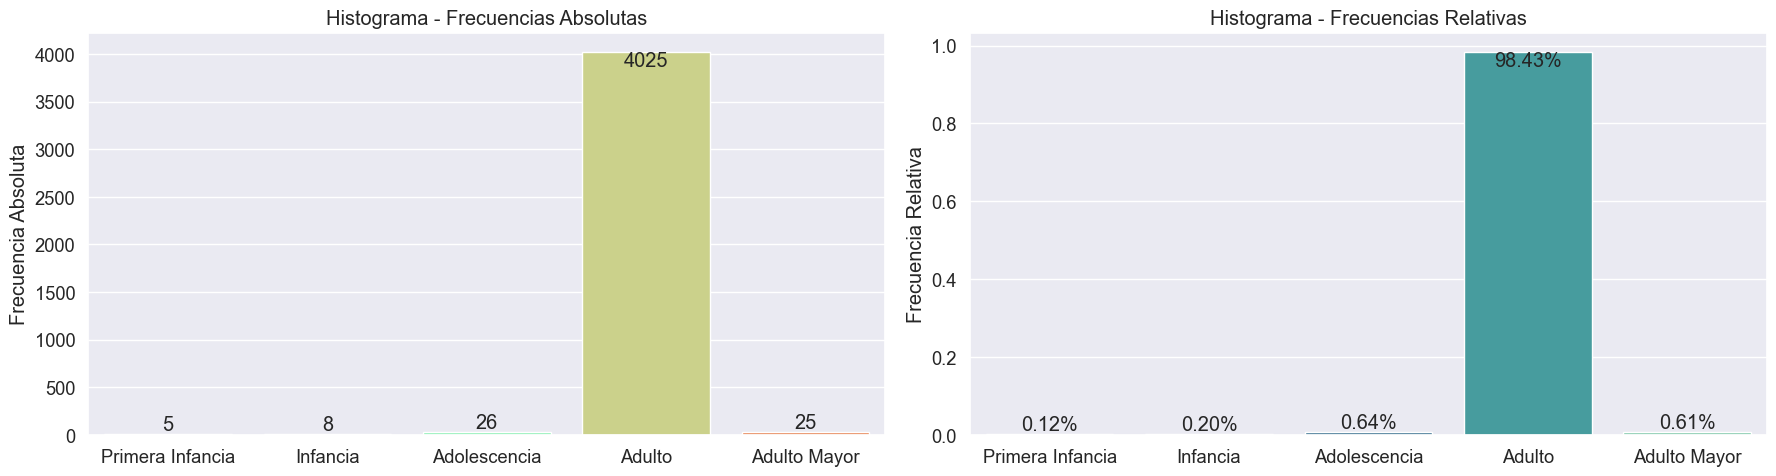

In [113]:



fa_df = pd.DataFrame({'Categorías': categorias, 'Frecuencia Absoluta': fa})


fr_df = pd.DataFrame({'Categorías': categorias, 'Frecuencia Relativa': fr})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))


sns.barplot(x='Categorías', y='Frecuencia Absoluta', data=fa_df, ax=axes[0], palette='rainbow')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frecuencia Absoluta')
axes[0].set_title('Histograma - Frecuencias Absolutas')
for i, v in enumerate(fa):
    axes[0].annotate(str(v), (i, v), ha='center', va='top' if v > 0.5*max(fa) else 'bottom')

sns.barplot(x='Categorías', y='Frecuencia Relativa', data=fr_df, ax=axes[1], palette='mako')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].set_title('Histograma - Frecuencias Relativas')
for i, v in enumerate(fr):
    axes[1].annotate('{:.2f}%'.format(v*100), (i, v), ha='center', va='top' if v > 0.5*max(fr) else 'bottom')
plt.tight_layout()
plt.show()

Al parecer, el dataset recopilado fur de 98% de casos de adultos, por lo que separar los casos así no tenía mucho sentido por la gran diferencia entre ellos.

### 2. Grafica de Distribucion De Frecuencia De Los Departamentos

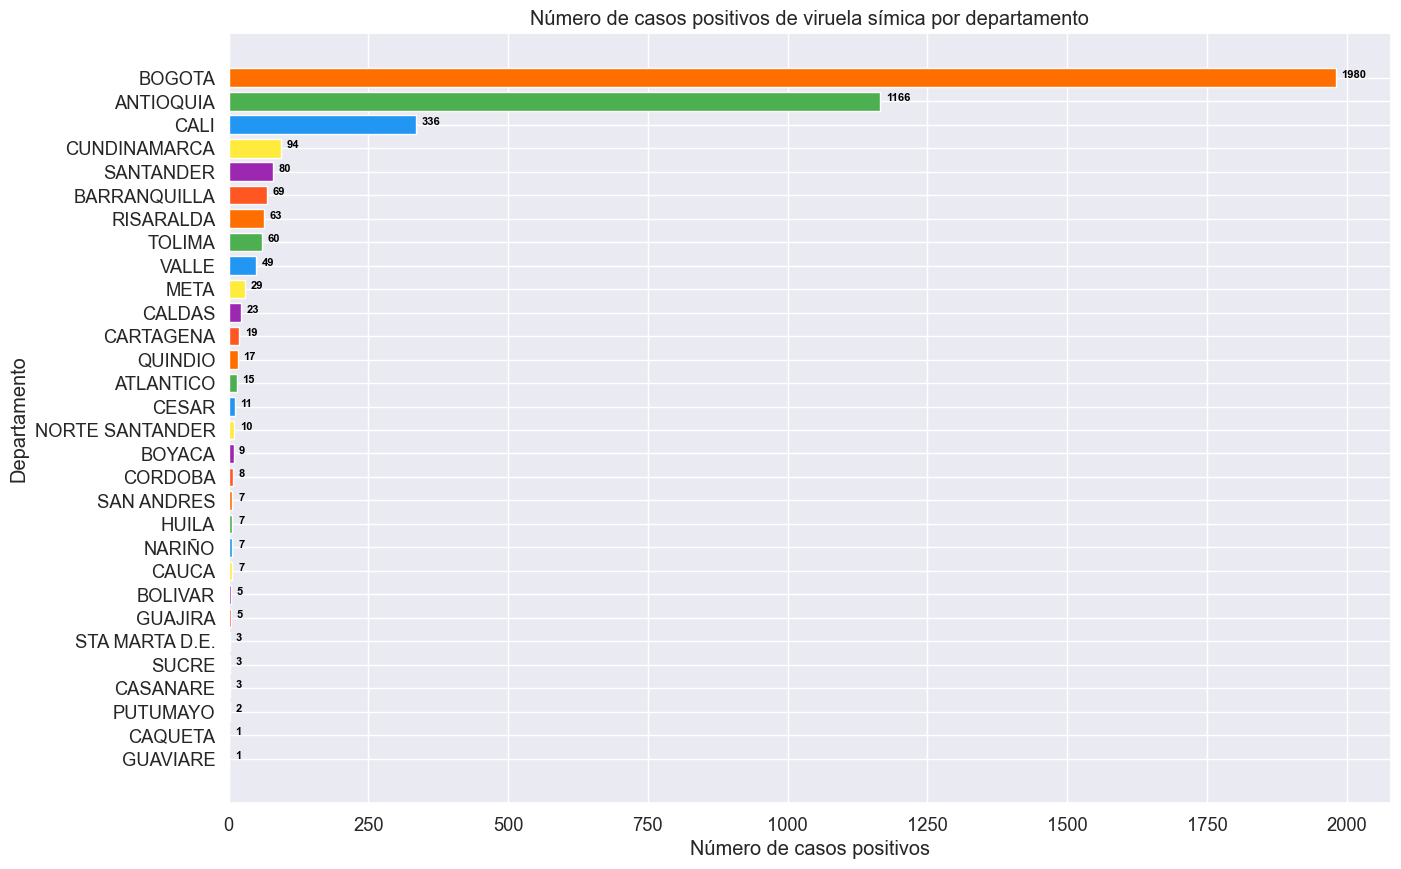

In [116]:

por_departamento = df['Departamento'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 10))

bar_colors = ['#FF6F00', '#4CAF50', '#2196F3', '#FFEB3B', '#9C27B0', '#FF5722']

bar_plot = ax.barh(por_departamento.index, por_departamento.values, color=bar_colors)

ax.invert_yaxis()

ax.set_xlabel('Número de casos positivos')
ax.set_ylabel('Departamento')
ax.set_title('Número de casos positivos de viruela símica por departamento')

for i, v in enumerate(por_departamento.values):
    ax.text(v + 10, i, str(v), color='black', fontsize=8, fontweight='bold')
    
plt.show()


Esta gráfica permite identificar los departamentos con mayor frecuencia de casos positivos de viruela simica en Colombia(Bogota), brindando una visión general de la distribución geográfica de la enfermedad. Es una herramienta útil para comprender la situación epidemiológica y apoyar la toma de decisiones en salud pública a nivel regional.

### 3. Serie de Tiempo sobre el inicio de síntomas por meses

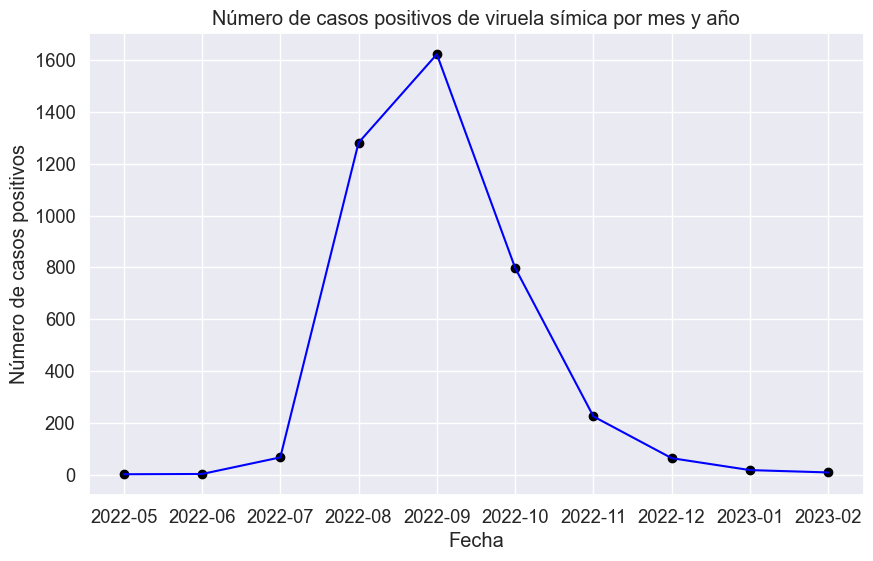

In [135]:

import matplotlib.dates as mdates

dfh = pd.read_csv('./Casos_positivos_de_Viruela_s_mica_en_Colombia.csv')
dfh['Fecha de inicio de síntomas'] = pd.to_datetime(dfh['Fecha de inicio de síntomas'])
dfh['Mes'] = dfh['Fecha de inicio de síntomas'].dt.month
dfh['Año'] = dfh['Fecha de inicio de síntomas'].dt.year
por_mes_y_anio = dfh.groupby(['Año', 'Mes'])['Fecha de inicio de síntomas'].count()
por_mes_y_anio = por_mes_y_anio.reset_index()
por_mes_y_anio['Fecha'] = por_mes_y_anio['Año'].astype(str) + '-' + por_mes_y_anio['Mes'].astype(str).str.zfill(2)
por_mes_y_anio = por_mes_y_anio.set_index(pd.to_datetime(por_mes_y_anio['Fecha'], format='%Y-%m'))
por_mes_y_anio = por_mes_y_anio.sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(por_mes_y_anio['Fecha'], por_mes_y_anio['Fecha de inicio de síntomas'], color = 'black')
plt.plot(por_mes_y_anio['Fecha'], por_mes_y_anio['Fecha de inicio de síntomas'], color = 'blue')
#plt.axvline(, color ='red')
plt.xlabel('Fecha')
plt.ylabel('Número de casos positivos')
plt.title('Número de casos positivos de viruela símica por mes y año')

plt.show()

La serie de tiempo sobre el inicio de síntomas por periodos de meses en dos años muestra la evolución de los casos de inicio de síntomas de viruela simica en Colombia a lo largo del tiempo, específicamente en cada mes.

Al analizar la serie de tiempo, se pueden detectar un pico (en la fecha 2022-09), lo que podría indicar la presencia de factores estacionales, epidemiológicos u otros factores que influyen en la propagación de la enfermedad.

### 4. Grafica de Violin de las edades por departamento

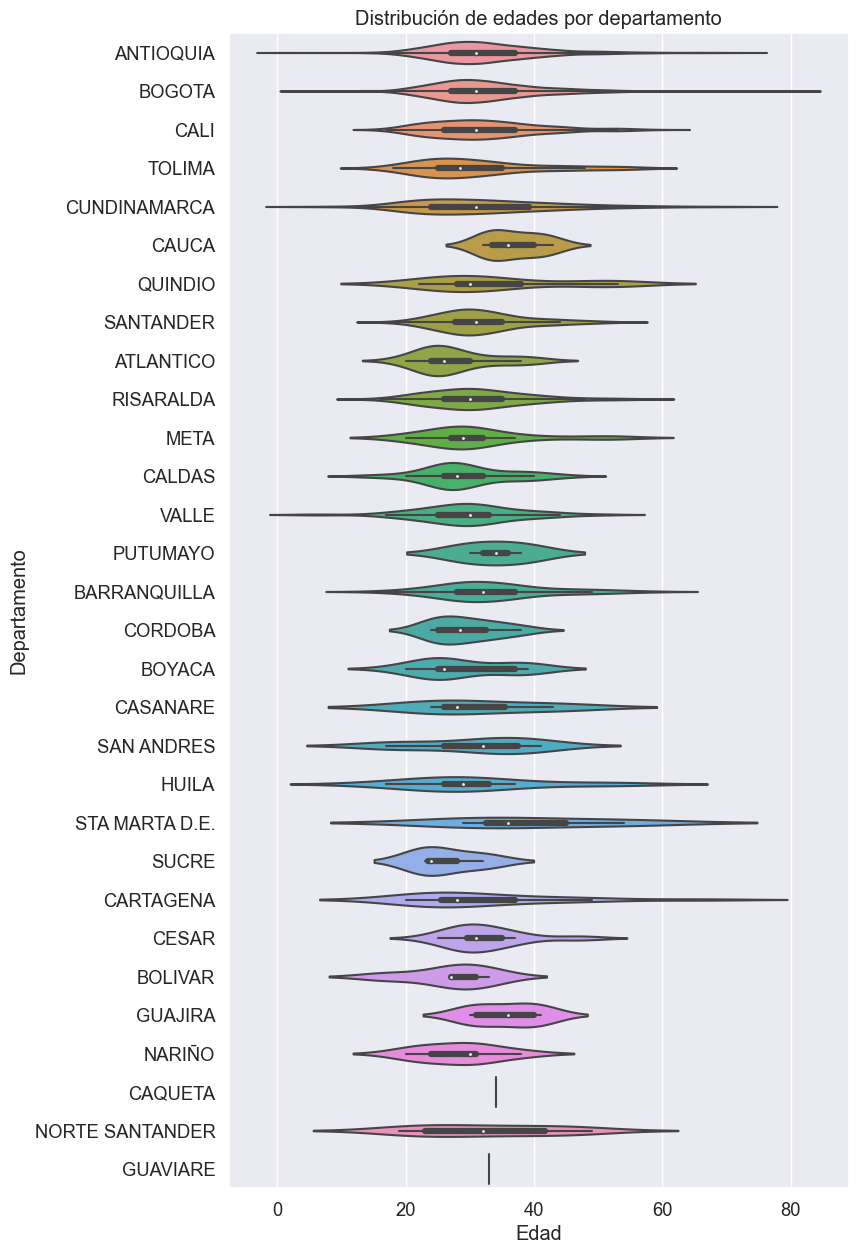

In [118]:
plt.figure(figsize=(8,15))
sns.violinplot(x='Edad', y='Departamento', data=df, orient='h')
plt.xlabel('Edad')
plt.ylabel('Departamento')
plt.title('Distribución de edades por departamento')
plt.show()

La gráfica de violín de las edades por departamento muestra la distribución de las edades de los casos positivos de viruela simica en Colombia, desglosada por departamento. 

En esta grafica, cada "violín" en la gráfica representa un departamento y su forma refleja la densidad de las edades en ese departamento. Los violines más anchos indican una mayor densidad de edades en esa región, mientras que los violines más estrechos representan una menor densidad.

### 5. Grafica de Violin Distribución de edades por sexo

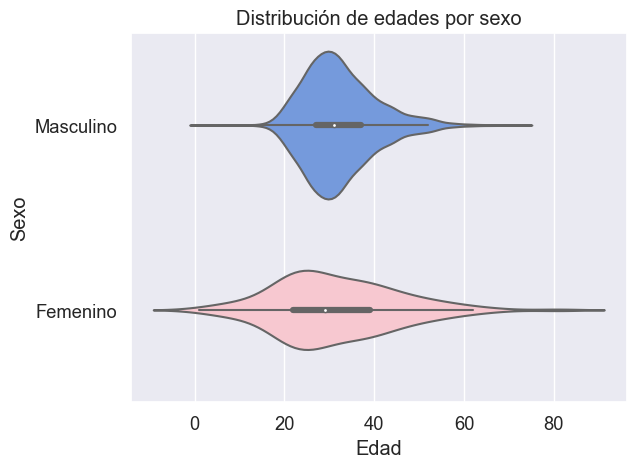

In [119]:
sex_map = {'F': 'Femenino', 'M': 'Masculino'}
df['Sexo_txt'] = df['Sexo'].map(sex_map)
colors = {"Femenino": "#FFC0CB", "Masculino": "#6495ED"}
sns.violinplot(x='Edad', y='Sexo_txt', data=df, orient='h', palette=colors)
plt.xlabel('Edad')
plt.ylabel('Sexo')
plt.title('Distribución de edades por sexo')
plt.show()

En la gráfica de violín, los casos positivos de viruela simica separados por sexo. El eje horizontal representa las edades, mientras que el eje vertical representa los dos sexos, masculino (M) y femenino (F).Esta gráfica permite comparar visualmente las distribuciones de edades entre los sexos masculino y femenino. 

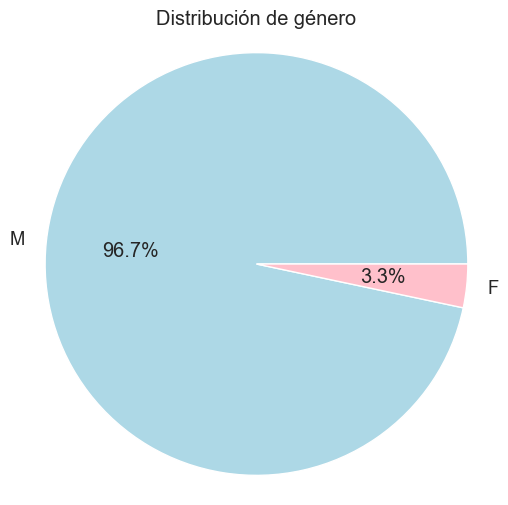

In [120]:

df_copy = df.copy()
df_copy['Sexo'] = df_copy['Sexo'].replace({'F': 'Femenino', 'M': 'Masculino'})
sexo_freq = df_copy['Sexo'].value_counts()
sexo_df = pd.DataFrame({'Sexo': sexo_freq.index, 'Frecuencia': sexo_freq.values})

sexo_df = pd.DataFrame(df['Sexo'].value_counts())
sexo_df.reset_index(inplace=True)
sexo_df.columns = ['Sexo', 'count']

colors = ['#ADD8E6', '#FFC0CB']

sns.set_palette(colors)


fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(sexo_df['count'], labels=sexo_df['Sexo'], autopct='%1.1f%%', startangle=0)

ax.axis('equal')
ax.set_title('Distribución de género')

plt.show()

Hemos de anotar que la mayoría de casos registrados fueron de hombres, con un 96.7% de los casos totales. Esto es interesante ya que llega a uno a preguntarse si la viruela afectaba más a hombres que a mujeres. 

### 6. Grafica de distribucion de frecuencia de los diferentes tipos de seguridad social

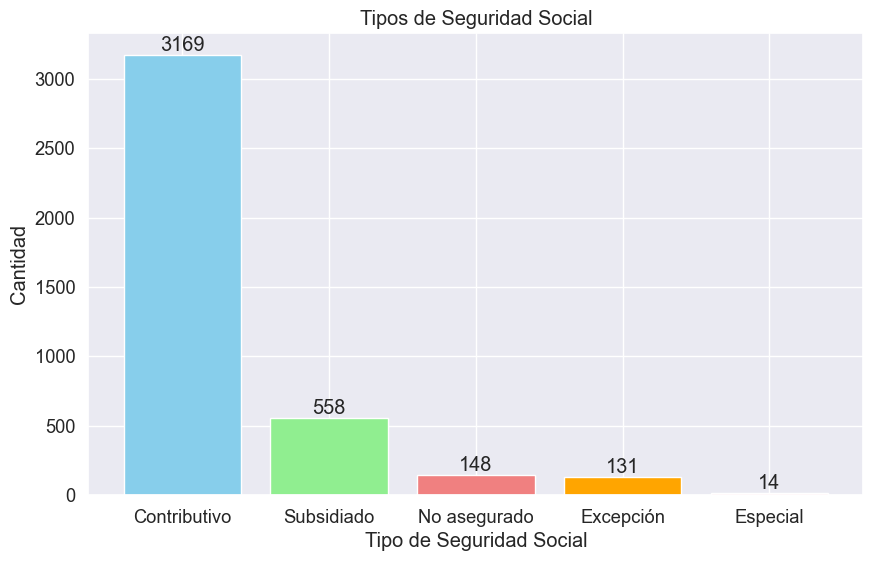

In [121]:
df = pd.read_csv('./Casos_positivos_de_Viruela_s_mica_en_Colombia.csv')
tipo_ss_nombres = {
    'C': 'Contributivo',
    'P': 'Excepción',
    'N': 'No asegurado',
    'S': 'Subsidiado',
    'E': 'Especial'
}
df['Tipo de seguridad social'] = df['Tipo de seguridad social'].map(tipo_ss_nombres)
conteo_tipo_ss = df['Tipo de seguridad social'].value_counts()
nombres = conteo_tipo_ss.index
valores = conteo_tipo_ss.values
colores = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'pink']
plt.figure(figsize=(10, 6))
plt.bar(nombres, valores, color=colores)
plt.title('Tipos de Seguridad Social')
plt.xlabel('Tipo de Seguridad Social')
plt.ylabel('Cantidad')
for i, v in enumerate(valores):
    plt.annotate(str(v), (i, v), ha='center', va='bottom')
plt.show()


La gráfica de barras por tipos de seguridad social muestra la cantidad de casos positivos de viruela símica en Colombia clasificados según el tipo de seguridad social. Cada barra representa un tipo de seguridad social y su altura indica la cantidad de casos positivos asociados a ese tipo. Además el se observa que el contributivo es la mayoría.